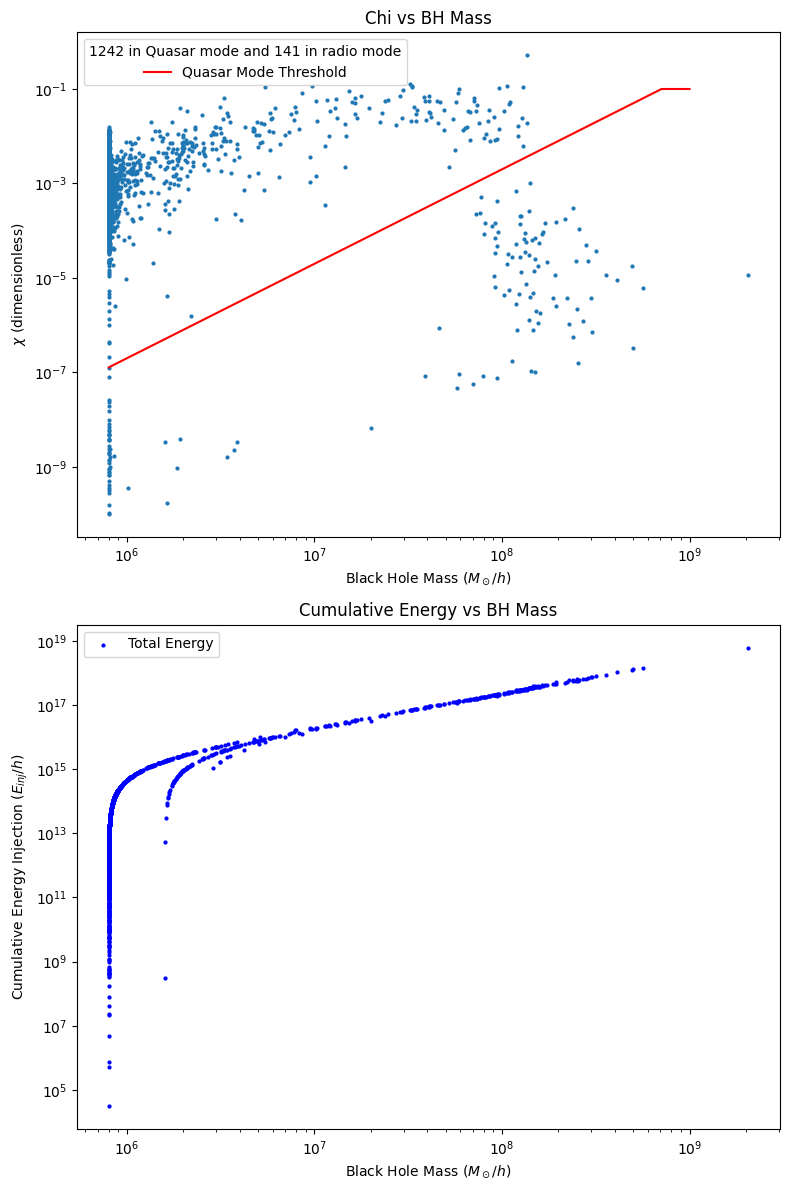

In [5]:
import h5py
import numpy as np 
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
from astropy.constants import mu0

file_path = "./data/Output-fidTNG_CAMELS/snap_032.hdf5"
f_catalog = "./data/Output-fidTNG_CAMELS/fof_subhalo_tab_032.hdf5"

data = h5py.File(file_path, "r") 
f = h5py.File(f_catalog, 'r')  

BH_MdotBondi = data["PartType5/BH_MdotBondi"][:] * 1e10  
BH_MdotEddington = data["PartType5/BH_MdotEddington"][:] * 1e10
Ed_ratio = BH_MdotBondi / BH_MdotEddington

BH_Mass = data["PartType5/BH_Mass"][:] * 1e10
RM_Egy = data["PartType5/BH_CumEgyInjection_RM"][:] * 1e10
QM_Egy = data["PartType5/BH_CumEgyInjection_QM"][:] * 1e10
Total_Egy = RM_Egy + QM_Egy  # Total cumulative energy

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# First panel (Chi vs BH Mass)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel('Black Hole Mass ($M_\odot / h$)')
ax1.set_ylabel('$\chi$ (dimensionless)')
ax1.set_title('Chi vs BH Mass')
sc1 = ax1.scatter(BH_Mass, Ed_ratio, s=4)

m_bh = np.linspace(8 * 1e5, 1e9, 5000)
chi_0 = 0.002
beta = 2

chi_threshold = chi_0 * (m_bh / 1e8) ** beta
chi_threshold[chi_threshold > 0.1] = 0.1

ax1.plot(m_bh, chi_threshold, label="Quasar Mode Threshold", color='r')

chi_sim_BH = chi_0 * (BH_Mass / 1e8) ** beta
num_Quasar_mode = 0 

for i, ratio in enumerate(Ed_ratio):    
    if ratio > chi_sim_BH[i]:
        num_Quasar_mode += 1

num_Radio_mode = np.size(BH_Mass) - num_Quasar_mode

ax1.legend(title=f"{num_Quasar_mode} in Quasar mode and {num_Radio_mode} in radio mode")

# Second panel (Cumulative Energy vs BH Mass)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('Black Hole Mass ($M_\odot / h$)')
ax2.set_ylabel('Cumulative Energy Injection ($E_{inj} / h$)')
ax2.set_title('Cumulative Energy vs BH Mass')
sc2 = ax2.scatter(BH_Mass, Total_Egy, s=4, color='b', label="Total Energy")

ax2.legend()

plt.tight_layout()
plt.show()

[4.0399015e+18 4.3508540e+07 0.0000000e+00 ... 5.4974988e+10 1.2558649e+10
 2.7192212e+13]


/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119872 (\N{MATHEMATICAL ITALIC CAPITAL M}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119888 (\N{MATHEMATICAL ITALIC SMALL C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119896 (\N{MATHEMATICAL ITALIC SMALL K}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119901 (\N{MATHEMATICAL ITALIC SMALL P}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 11986

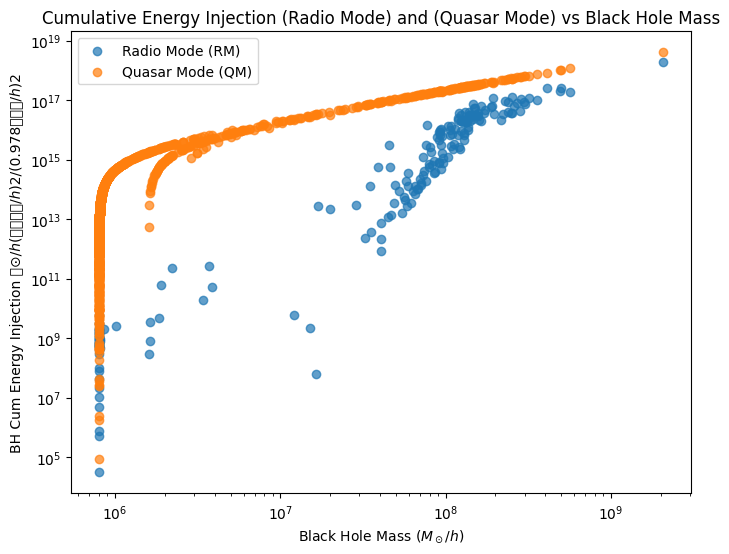

In [6]:
plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Black Hole Mass ($M_\odot / h$)')
plt.ylabel('BH Cum Energy Injection 𝑀⊙/ℎ(𝑐𝑘𝑝𝑐/ℎ)2/(0.978𝐺𝑦𝑟/ℎ)2')
plt.title('Cumulative Energy Injection (Radio Mode) and (Quasar Mode) vs Black Hole Mass') 

print(QM_Egy)
plt.scatter(BH_Mass, RM_Egy, label='Radio Mode (RM)', alpha=0.7)
plt.scatter(BH_Mass, QM_Egy, label='Quasar Mode (QM)', alpha=0.7)

plt.legend()

plt.show()

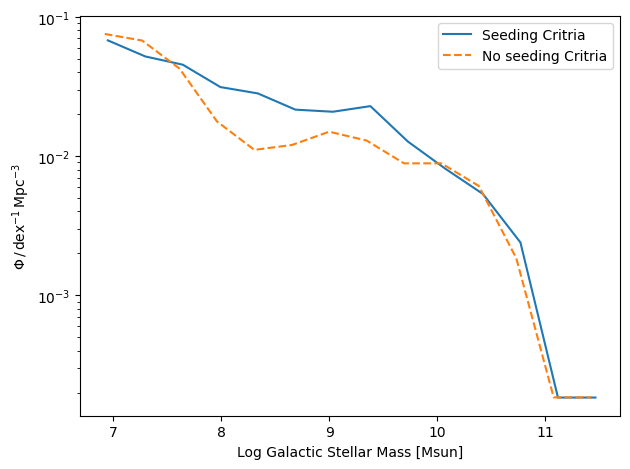

In [47]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def snapshot_graph(file_path, f_catalog): 
    num_bins = 15
    
    f =h5py.File(f_catalog, 'r')
    data = h5py.File(file_path, "r") 

    redshift = data["Header"].attrs["Redshift"]
    idex_main_subhalo = f['Group/GroupFirstSub'][:]
    halo_masses = f['Group/GroupMass'][:] * 1e10
    stellar_masses = f["Subhalo/SubhaloMassInHalfRadType"][:, 4] * 1e10  # Stellar mass in half radius
    stellar_masses = stellar_masses[stellar_masses > 0]  # Filter out zero mass

    # Log mass and mass function
    stellar_mass_list = np.array(stellar_masses)
    logM = np.log10(stellar_mass_list)
    V = 25 ** 3  # Survey volume in Mpc^3
    Phi, edg = np.histogram(logM, bins=num_bins)
    dM = edg[1] - edg[0]  # Bin size
    Max = edg[:-1] + dM / 2.  # Mass axis
    Phi = Phi / V / dM  # Normalize to volume and bin size

    return Max, Phi

# Paths for the two simulations
file_path_simba_seedcri = "data/Output-1M-BH_accsimba_seedcri-SF_/snap_029.hdf5"
f_catalog_simba_seedcri = "data/Output-1M-BH_accsimba_seedcri-SF_/fof_subhalo_tab_029.hdf5"

file_path_simba = "data/Output-1M-BH_accsimba-SF_/snap_029.hdf5"
f_catalog_simba = "data/Output-1M-BH_accsimba-SF_/fof_subhalo_tab_029.hdf5"

# Run the snapshot graph for both simulations
Max_seedcri, Phi_seedcri = snapshot_graph(file_path_simba_seedcri, f_catalog_simba_seedcri)
Max_simba, Phi_simba = snapshot_graph(file_path_simba, f_catalog_simba)
# Plot the results together
plt.clf()
plt.yscale('log')
plt.xlabel('Log Galactic Stellar Mass [Msun]')
plt.ylabel(r'$\Phi\,/\,\mathrm{dex}^{-1}\,\mathrm{Mpc}^{-3}$')
plt.plot(Max_seedcri[1:], Phi_seedcri[1:], ls='-', label='Seeding Critria')
plt.plot(Max_simba[1:], Phi_simba[1:], ls='--', label='No seeding Critria')

plt.legend()
plt.tight_layout()
plt.show()
# Plot SMF of these two and data/Output-1M-BH_accsimba_seedcri_seedmass-SF_

In [48]:
file_path_simba_seedcri = "data/Output-1M-BH_accsimba_seedcri-SF_/snap_029.hdf5"
f_catalog_simba_seedcri = "data/Output-1M-BH_accsimba_seedcri-SF_/fof_subhalo_tab_029.hdf5"

file_path_simba = "data/Output-1M-BH_accsimba-SF_/snapshot_029.hdf5"
f_catalog_simba = "data/Output-1M-BH_accsimba-SF_/fof_subhalo_tab_029.hdf5"

In [41]:
f = h5py.File("data/Output-1M-BH_accsimba-SF_/snap_029.hdf5", 'r')
print(f)

<HDF5 file "snap_029.hdf5" (mode r)>


In [37]:
!ls data/Output-1M-BH_accsimba_seedcri-SF_/snap_029.hdf5

data/Output-1M-BH_accsimba_seedcri-SF_/snap_029.hdf5
